In [1]:
import pandas as pd
import numpy as np
import math

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime

Import des données fournies

In [2]:
df=pd.read_csv("Camp_Market.csv", sep=";")

Analyse et nettoyage des données

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#Conversion de DT_Customer en format date

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [8]:
#Supprimer les colonnes inutiles

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [9]:
#Vérifier si des valeurs sont nulles

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

On voit donc que certaines valeurs sont manquantes dans les revenus

<Axes: >

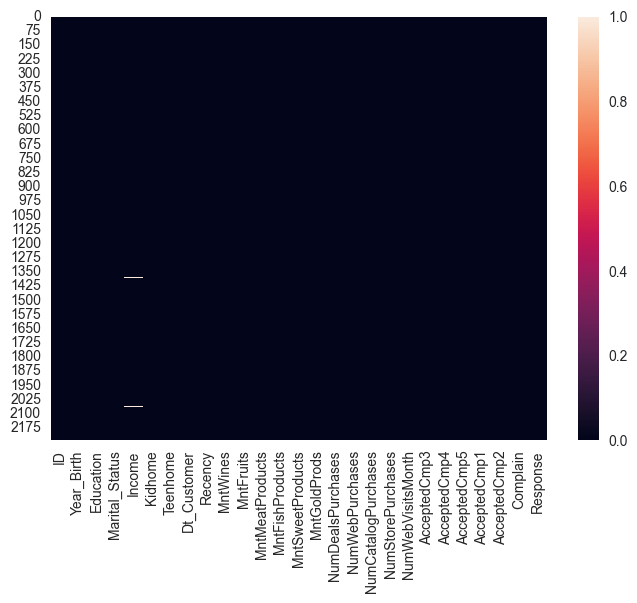

In [10]:
#Vérifier quelles donénes sont manquantes

sns.heatmap(df.isnull())

In [11]:
#Remplacer les valeurs nulles par une moyennes

df['Income'] = df['Income'].fillna(df.groupby( 'Education')['Income'].transform( 'mean'))

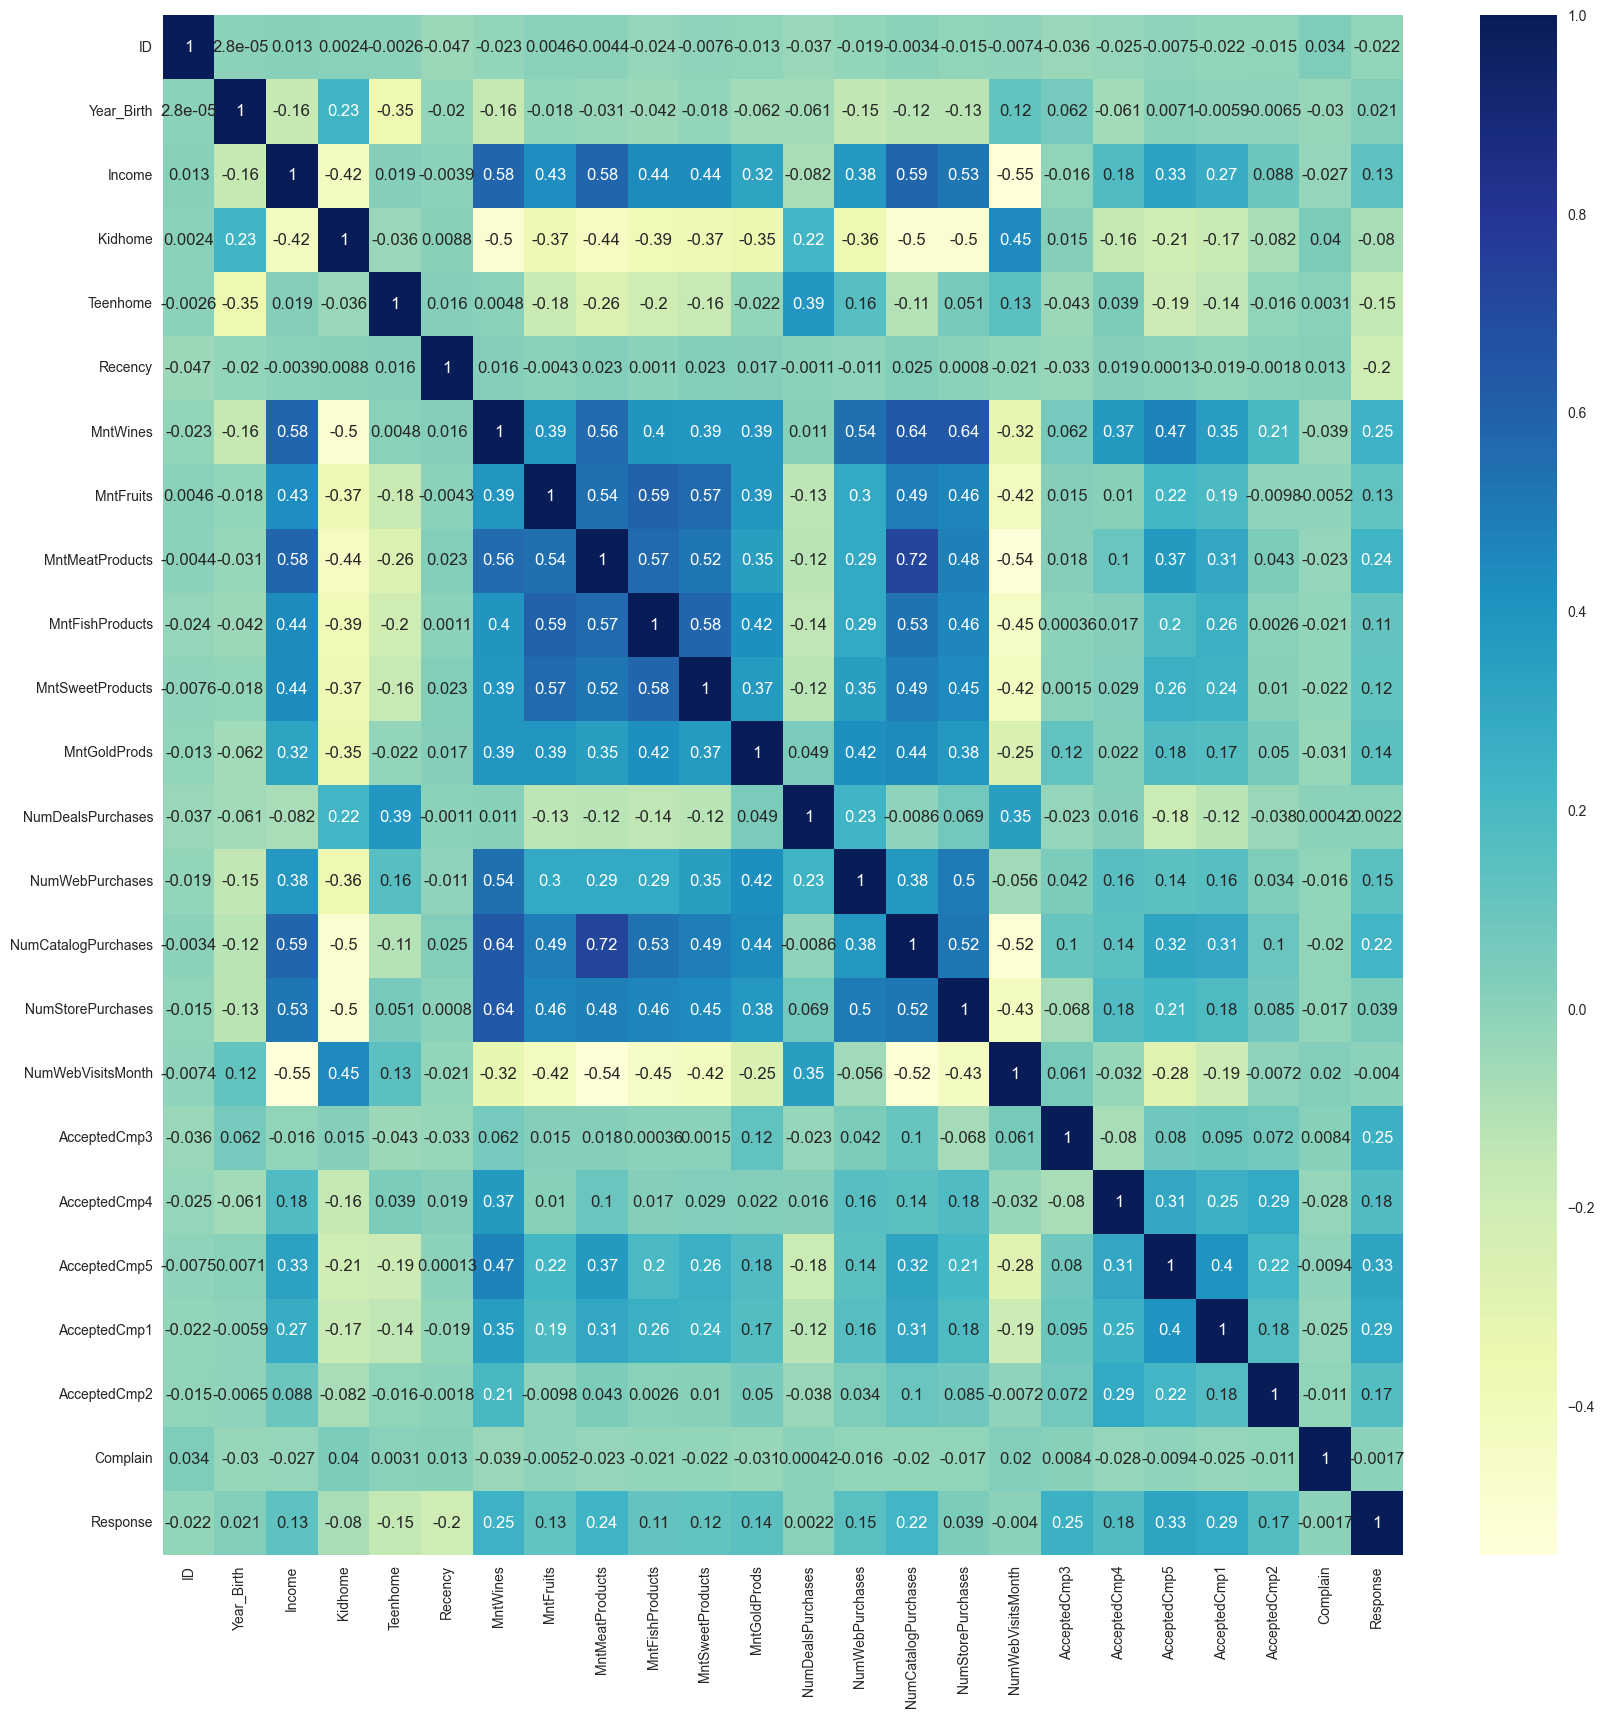

In [12]:
#Vérifier les corrélations via une matrice

df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20,20))
sns.heatmap(df_numeric.corr(), annot=True, cmap="YlGnBu",)
plt.show()

D'après cette matrice, les corrélations les plus fortes sont entre le nombre de commandes effectuées via le catalogue et le nombre de produits de type 'Meat' achetés.

In [13]:
#Vérifier les corrélation les plus importantes

corr = df_numeric.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts    NumCatalogPurchases    0.723827
NumStorePurchases  MntWines               0.642100
MntWines           NumCatalogPurchases    0.635226
MntFishProducts    MntFruits              0.594804
Income             NumCatalogPurchases    0.586743
MntSweetProducts   MntFishProducts        0.579870
Income             MntMeatProducts        0.577160
                   MntWines               0.576780
MntFishProducts    MntMeatProducts        0.568402
MntSweetProducts   MntFruits              0.567164
MntMeatProducts    MntWines               0.562667
Income             NumWebVisitsMonth      0.549709
MntMeatProducts    MntFruits              0.543105
dtype: float64

Visualisation des données

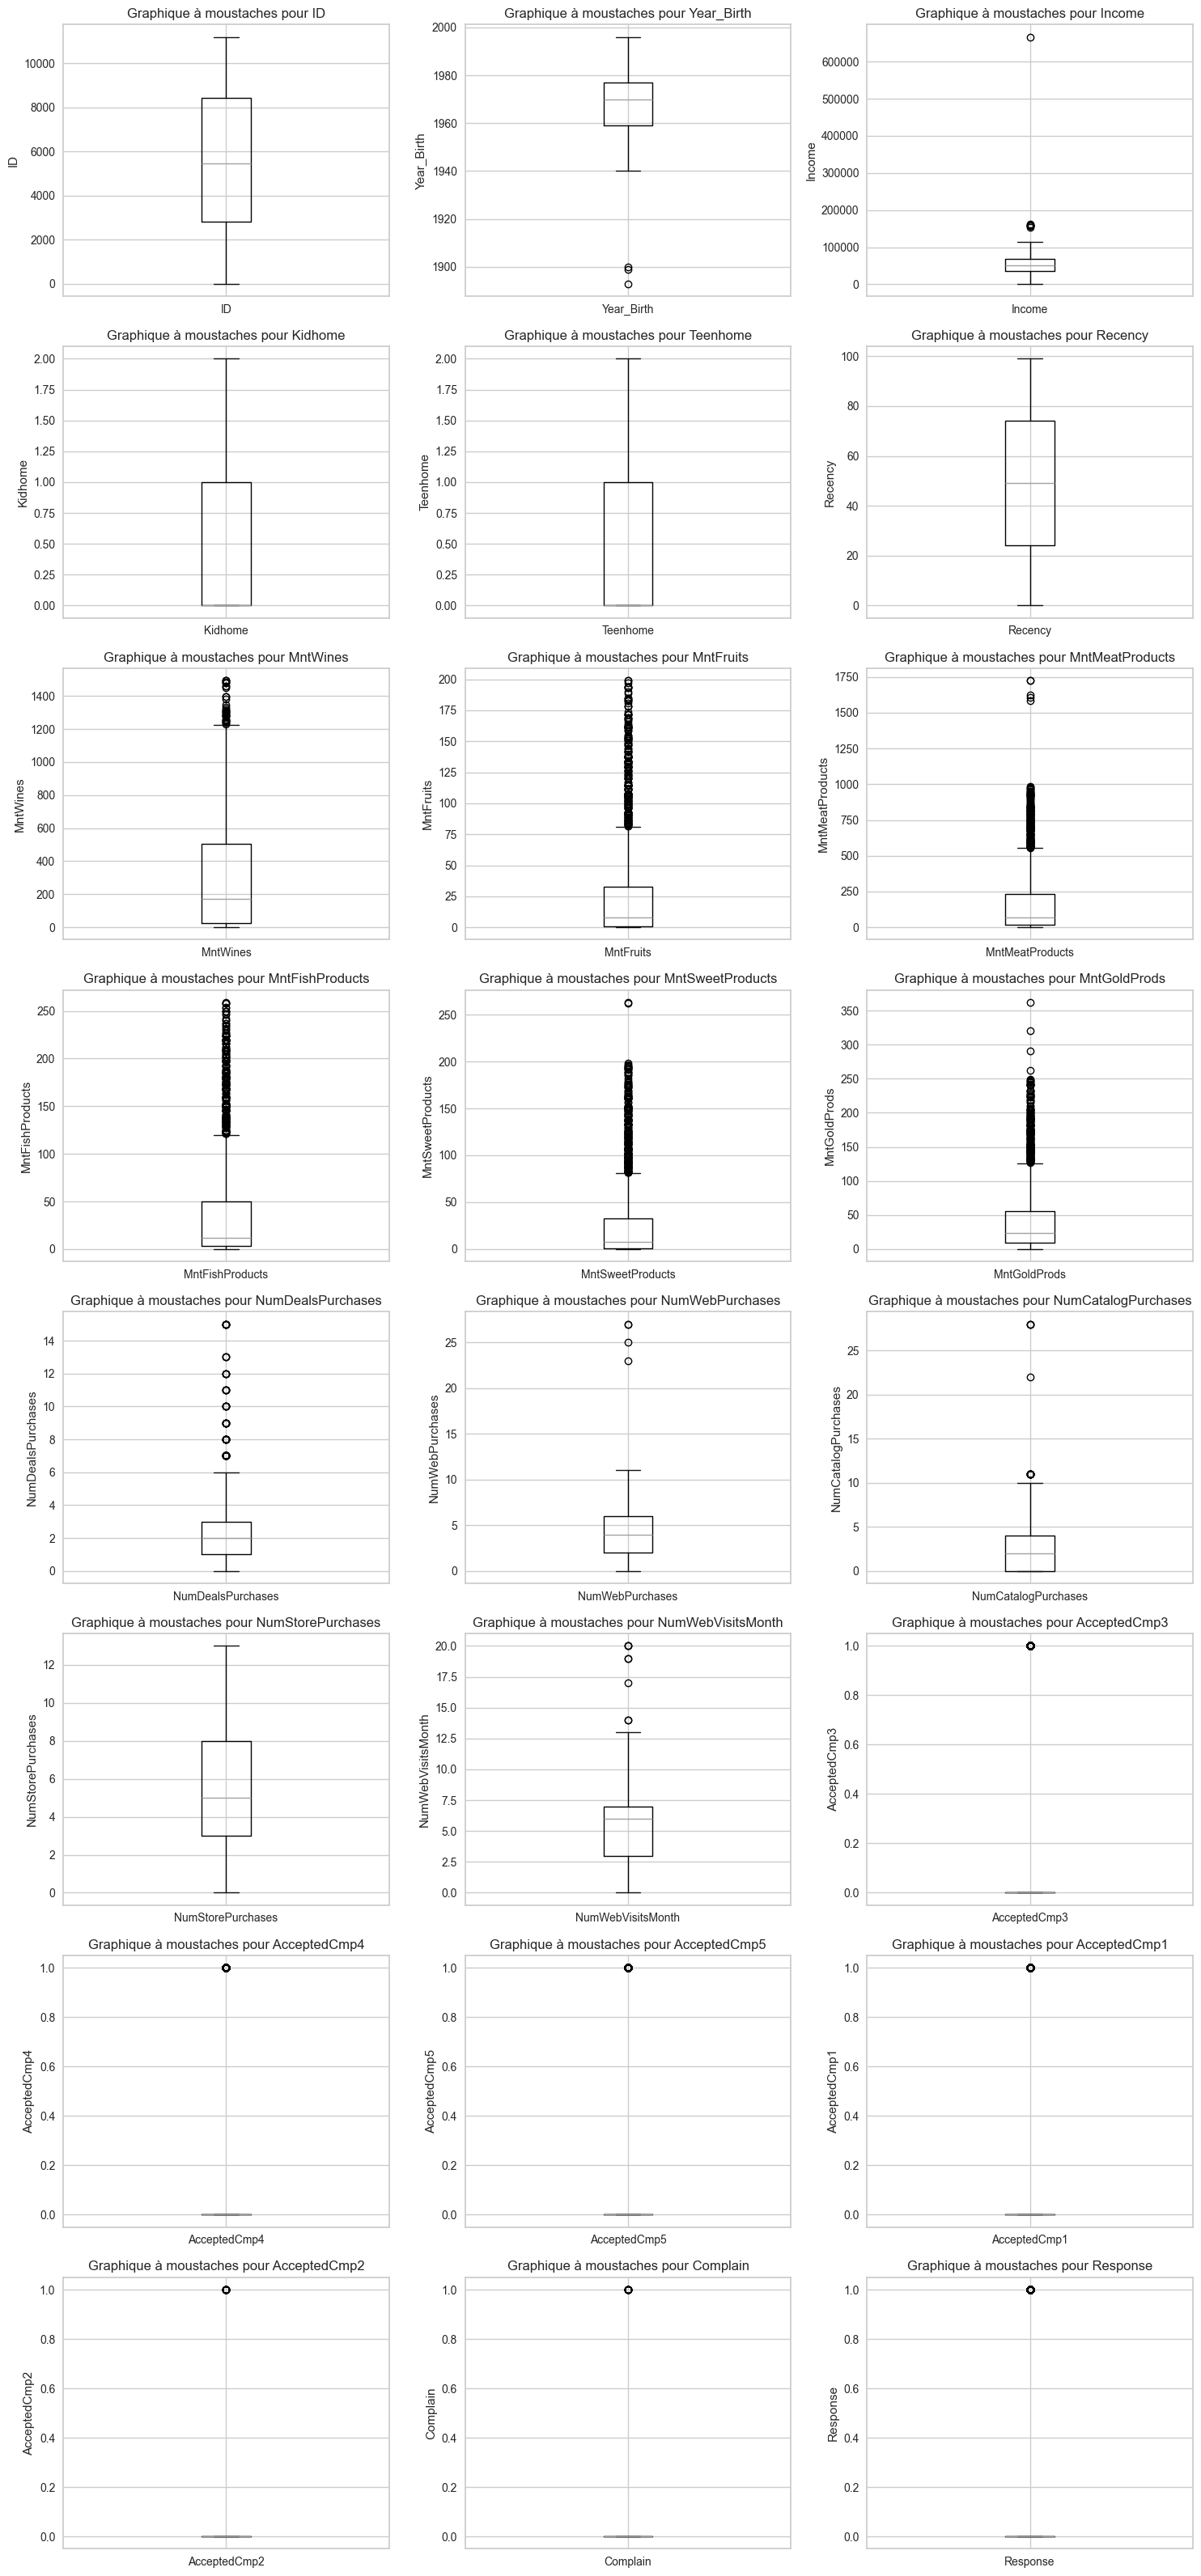

In [14]:
#Visualisationb sous forme de boites à moustache pour retrouver les valeurs aberrantes

numeric_cols = df.select_dtypes(include=['float64', 'int64'])
cols_per_row = 3
num_cols = len(numeric_cols.columns)
num_rows = math.ceil(num_cols / cols_per_row)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    numeric_cols.boxplot(column=[col], ax=axes[i])
    axes[i].set_title(f'Graphique à moustaches pour {col}')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Filtrage des valeurs incohérentes

<Axes: >

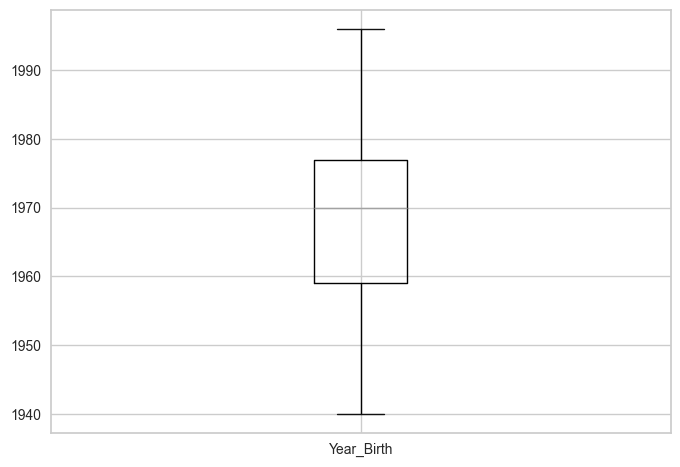

In [15]:
#Pour avoir des valeurs plus cohérentes, on décide de retirer les personnes nées avant 1900 et les personnes qui ont des revenus supérieurs à 200k€.

df = df[df['Year_Birth'] > 1900]
df = df[df['Income'] < 200000]
data=df
og=df
plt.figure()
df.boxplot(column=["Year_Birth"])

On n'observe donc plus aucune valeur aberrantes

Création des nouveaux champs

In [16]:
#Création d'une colonne âge plutôt que date de naissance

current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop(columns=['Year_Birth'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,43


In [17]:
#Affichage de la répartition des clients par âge

fig = px.histogram(df, x='Age', nbins=20, title='Distribution des âges des clients',
                   labels={'Age': 'Âge'}, 
                   color_discrete_sequence=['skyblue'])
fig.show()

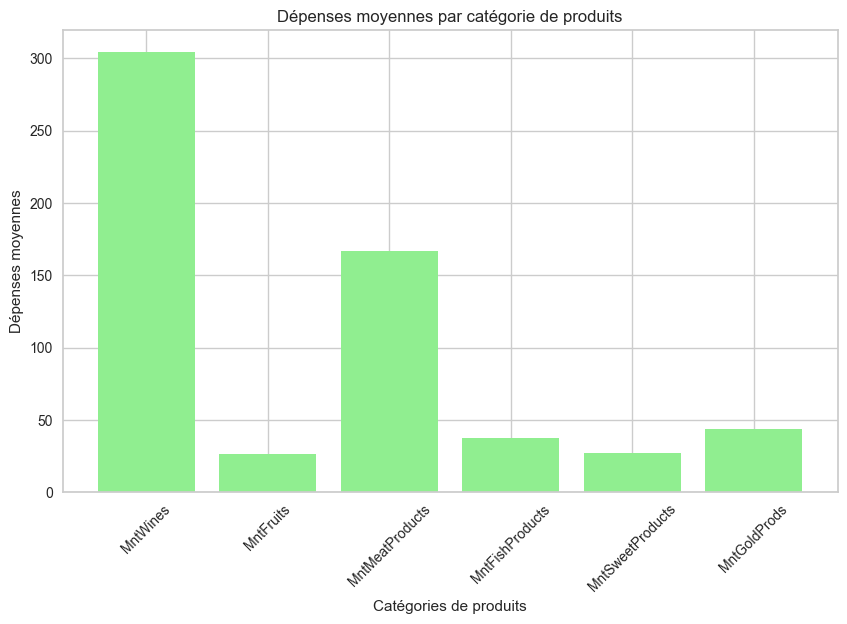

In [18]:
#Calcul des dépenses par catégories de produits

# Dépenses moyennes dans chaque catégorie de produits
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
moyennes = df[categories].mean()

# Créer un diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(categories, moyennes, color='lightgreen')
plt.title('Dépenses moyennes par catégorie de produits')
plt.xlabel('Catégories de produits')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=45)
plt.show()

On voit que les produits les plus achetés sont le vin et la viande.

Analyse des performances de campagnes

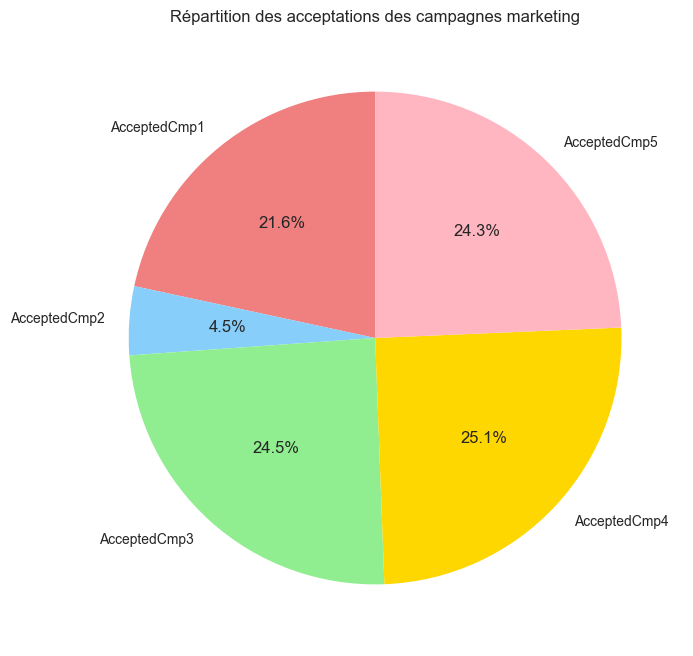

In [19]:
# Somme des clients ayant accepté chaque campagne
campagnes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptations = df[campagnes].sum()

# Créer un graphique en secteurs
plt.figure(figsize=(8, 8))
plt.pie(acceptations, labels=campagnes, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Répartition des acceptations des campagnes marketing')
plt.show()

On peut voir que la 2ème campagne a eu très peu d'impact alors que les 4 autres on eu le même impact.
Peut-être que le ciblage de cette 2nd campagne n'était pas bon.

Déterminer l'impact des enfants sur les dépenses

                MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Has_Children                                                            
Avec enfants  231.321451  15.943089        85.185741        22.012508   
Sans enfants  486.885400  52.213501       372.312402        76.503925   

              MntSweetProducts  MntGoldProds  
Has_Children                                  
Avec enfants         16.737336     36.049406  
Sans enfants         53.043956     63.897959  


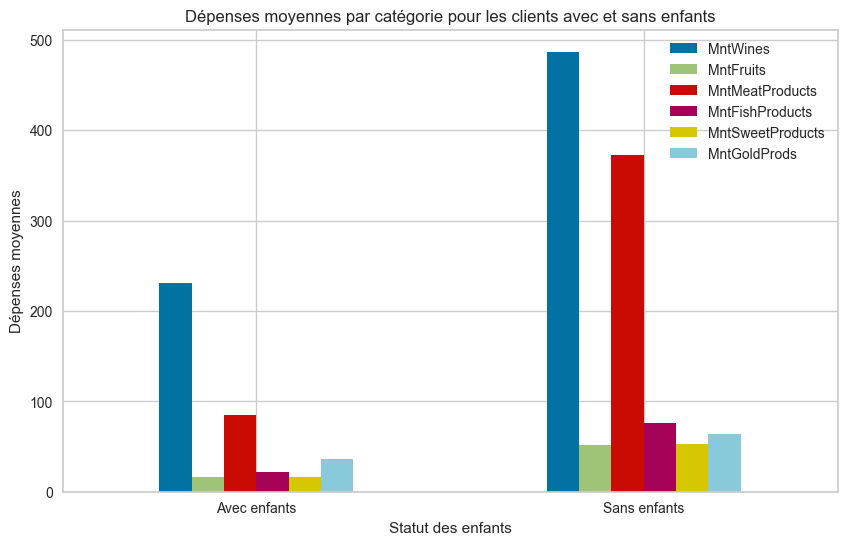

In [20]:
# Créer une nouvelle colonne pour indiquer si le client a des enfants
df_Kids=df.copy()
df_Kids['Has_Children'] = df_Kids['Kidhome'] + df_Kids['Teenhome']
df_Kids['Has_Children'] = df_Kids['Has_Children'].apply(lambda x: 'Avec enfants' if x > 0 else 'Sans enfants')

# Comparer les dépenses moyennes pour ceux avec et sans enfants
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

depenses_moyennes = df_Kids.groupby('Has_Children')[categories].mean()

# Afficher les résultats
print(depenses_moyennes)

# Visualiser les résultats avec un diagramme en barres
depenses_moyennes.plot(kind='bar', figsize=(10, 6))
plt.title('Dépenses moyennes par catégorie pour les clients avec et sans enfants')
plt.xlabel('Statut des enfants')
plt.ylabel('Dépenses moyennes')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

On voit donc que les personnes sans enfants dépensent beaucoup plus, notamment dans les produits 'Meat' et 'Wines'.

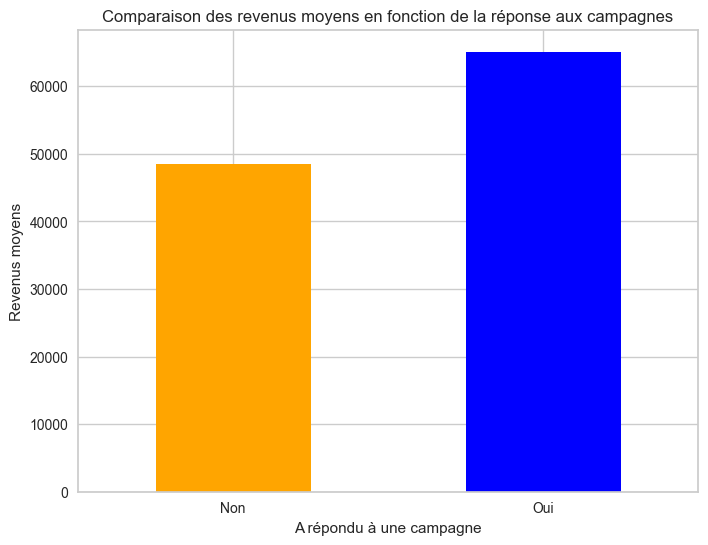

In [21]:
df_resp=df.copy()
df_resp['Has_Responded'] = df_resp[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

# Comparer les revenus moyens entre ceux qui ont répondu et ceux qui n'ont pas répondu
revenus_moyens = df_resp.groupby('Has_Responded')['Income'].mean()

# Visualiser avec un diagramme en barres
plt.figure(figsize=(8, 6))
revenus_moyens.plot(kind='bar', color=['orange', 'blue'])
plt.title('Comparaison des revenus moyens en fonction de la réponse aux campagnes')
plt.xlabel('A répondu à une campagne')
plt.ylabel('Revenus moyens')
plt.xticks([0, 1], ['Non', 'Oui'], rotation=0)
plt.show()

On voit ici que le revenu moyen des personne ayant répondu aux campagnes est plus élevé

In [22]:
df = df.set_index('ID')

Regrouper les données

In [23]:
#Regrouper '2n Cycle' et 'Master'

df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Education'].value_counts()

Education
Graduation    1126
Master         571
PhD            485
Basic           54
Name: count, dtype: int64

In [24]:
#Regrouper les Marital_Status dans 'Single' ou 'Relationship'

mar_stat = ['Single', 'Widow', 'Alone', 'Absurd', 'YOLO']
df['Marital_Status'] = np.where(df['Marital_Status'].isin(mar_stat), 'Single', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Married', 'Together']), 'Relationship', 'Single')
df['Marital_Status'].value_counts()

Marital_Status
Relationship    1442
Single           794
Name: count, dtype: int64

In [25]:
#Regrouper 'Kidhome' et 'Teenhome' dans une même colonne nommée 'Kids'

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].value_counts()

Kids
1    1125
0     637
2     421
3      53
Name: count, dtype: int64

In [26]:
#Calculer le temps d'adhésion du client à partir de sa date d'adhésion

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)
last_enrollment = pd.to_datetime(df['Dt_Customer'].max(), utc=False)
df['Days_Enrolled'] = (last_enrollment-df['Dt_Customer']).dt.days

In [27]:
#Supprimer les colonnes regroupées

df.drop(columns = ['Kidhome', 'Teenhome', 'Dt_Customer'], inplace=True)

Calcul et visualisation des dépenses totales

In [28]:


df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

fig = px.scatter(df, x='Income', y='Total_Spend', title='Relation entre les revenus et les dépenses totales des clients',
                 labels={'Income': 'Revenus', 'Total_Spend': 'Dépenses totales'},
                 hover_data=['Education', 'Marital_Status'],
                 color='Education')  # Ajouter la couleur par le niveau d'éducation

# Afficher le graphique
fig.show()

Regrouper les différentes campagnes pour déterminer si le client a réponde à au moins une d'entre elles

In [29]:
df['CouponsAccepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebVisitsMonth'], inplace=True)

Déterminer si le client achète principalement en ligne (web ou catalogue) ou en magasin

In [30]:
df.rename(columns={'NumStorePurchases':'Store_Purchases'}, inplace=True)
df['Non_Store_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']

Catégoriser le client par client Online ou Offline

In [31]:
df['Total_Purchases'] = df['Store_Purchases']+df['Non_Store_Purchases']
df['Store_Purchases_Pct'] = df['Store_Purchases']/df['Total_Purchases']
df['Non_Store_Purchases_Pct'] = 1-df['Store_Purchases_Pct']
df['Customer_Type'] = np.where(df['Store_Purchases_Pct'] >= 0.5, "Offline", "Online")

In [32]:
df.head()


,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,Store_Purchases,Complain,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Non_Store_Purchases,Total_Purchases,Store_Purchases_Pct,Non_Store_Purchases_Pct,Customer_Type
ID,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,58,3,8,10,4,0,67,0,663,1617,1,18,22,0.181818,0.818182,Online
2174,Graduation,Single,46344.0,38,2,1,1,2,0,70,2,113,27,0,2,4,0.500000,0.500000,Offline
4141,Graduation,Relationship,71613.0,26,1,8,2,10,0,59,0,312,776,0,10,20,0.500000,0.500000,Offline
6182,Graduation,Relationship,26646.0,26,2,2,0,4,0,40,1,139,53,0,2,6,0.666667,0.333333,Offline
5324,PhD,Relationship,58293.0,94,5,5,3,6,0,43,1,161,422,0,8,14,0.428571,0.571429,Online


In [33]:
#Supprimer les colonnes devenues inutiles

df.drop(columns=['Store_Purchases_Pct', 'Non_Store_Purchases_Pct', 'Non_Store_Purchases', 'NumWebPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Store_Purchases'], inplace=True)

Calculer l'âge par segments pour regrouper les clients

In [34]:
df['Age'] = np.where(df['Age'] <= 30, "(0,30]", np.where(df['Age'] <= 40, "(30,40]", np.where(df['Age'] <= 50, "(40,50]", np.where(df['Age'] <= 60, "(50, 60]", np.where(df['Age'] <=70, "(60, 70]", (70, ))))))

In [35]:
df['Recency_'] = df['Recency']/14
df['Recency_'] = df['Recency_'].apply(lambda x : str(x))
df.drop(columns = ['Recency'], inplace=True)

In [36]:
df.drop(columns=['Customer_Type', 'Complain'], inplace=True)

In [37]:
df_ = df.copy()
df_.reset_index(inplace=True)

Export du CSV avec les données nettoyées et préparées

In [38]:
df.to_csv("Prepared_Data.csv")

Création d'une nouvelle matrice de corrélation avec les données nettoyées

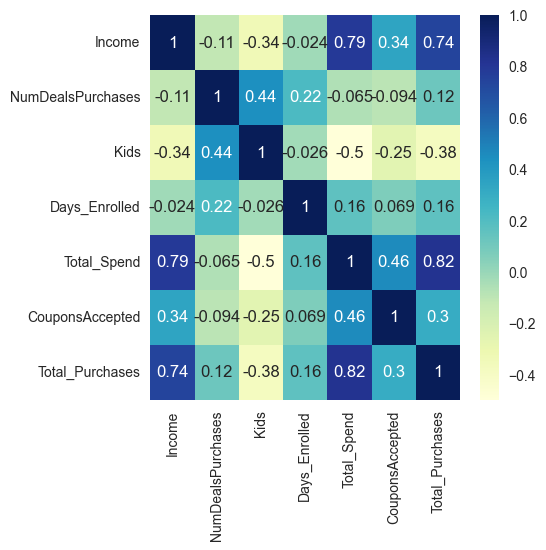

In [39]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(5,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="YlGnBu",)
plt.show()

On observe sur cette amtrice, de fortes corrélations entre les dépenses et le nombre d'achats ainsi qu'entre les revenus, les dépenses et les achats.

Création d'un graphique 3 dimensions type 'RFM' et clustering des clients
Utilisation de K-Mean pour le clustering
Données utilisées : Recence, Fréquence et Dépenses
Pour pouvoir être correctement visualisé, ce clustering n'est basé que sur 3 dimensions.

In [40]:
rfm_data = pd.DataFrame()

# Récence (Recency) : déjà présente dans les données
rfm_data['Recency'] = data['Recency']

# Fréquence (Frequency) : somme des différents types d'achats
rfm_data['Frequency'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Montant (Monetary) : somme des montants dépensés dans les différentes catégories de produits
rfm_data['Monetary'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Normalisation des données RFM pour le clustering
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

# Application du clustering K-means avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Création du graphique interactif en 3D avec Plotly
fig = px.scatter_3d(
    rfm_data, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster',
    title='Segmentation des clients en 3D (RFM)',
    labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.update_traces(marker=dict(size=4))  # Vous pouvez ajuster cette valeur pour changer la taille des points

# Affichage du graphique interactif
fig.show()

# Affichage des premiers résultats de la segmentation RFM avec les clusters
rfm_data.head()

,Recency,Frequency,Monetary,Cluster
0,58,22,1617,1
1,38,4,27,0
2,26,20,776,3
3,26,6,53,0
4,94,14,422,2


In [41]:
df = pd.read_csv('Prepared_Data.csv', index_col=0)
df_copy = df.copy()
df_ = df.copy()
df_.reset_index(inplace=True)
df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,5524,Graduation,Single,58138.0,3,"(60, 70]",0,663,1617,1,22,4.142857
1,2174,Graduation,Single,46344.0,2,"(60, 70]",2,113,27,0,4,2.714286
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",0,312,776,0,20,1.857143
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,139,53,0,6,1.857143
4,5324,PhD,Relationship,58293.0,5,"(40,50]",1,161,422,0,14,6.714286


Normalisation des données numériques (Float et Int) pour préparer le clustering basé sur toutes les dimensions du dataframe

In [42]:
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Income', 'NumDealsPurchases', 'Kids', 'Days_Enrolled', 'Total_Spend', 'CouponsAccepted', 'Total_Purchases', 'Recency_']


In [43]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])
df.dtypes

Education             object
Marital_Status        object
Income               float64
NumDealsPurchases    float64
Age                   object
Kids                 float64
Days_Enrolled        float64
Total_Spend          float64
CouponsAccepted      float64
Total_Purchases      float64
Recency_             float64
dtype: object

In [44]:
df.reset_index('ID', inplace=True)
df.reset_index(inplace=True)
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,0,5524,Graduation,Single,0.288195,0.348738,"(60, 70]",-1.264308,1.529793,1.680176,0.620456,1.312080,0.306856
1,1,2174,Graduation,Single,-0.262715,-0.168700,"(60, 70]",1.395139,-1.191143,-0.962202,-0.501987,-1.186198,-0.383971
2,2,4141,Graduation,Relationship,0.917627,-0.686137,"(50, 60]",-1.264308,-0.206659,0.282541,-0.501987,1.034493,-0.798467
3,3,6182,Graduation,Relationship,-1.182829,-0.168700,"(30,40]",0.065416,-1.062517,-0.918994,-0.501987,-0.908611,-0.798467
4,4,5324,PhD,Relationship,0.295435,1.383614,"(40,50]",0.065416,-0.953679,-0.305762,-0.501987,0.201734,1.550344


Encodage des objets pour préparer le clustering

In [45]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Age']

In [46]:
onehotencoder = OneHotEncoder() 
data = pd.DataFrame(onehotencoder.fit_transform(df[['Age', 'Recency_']]).toarray())
data = data.reset_index()
df = pd.merge(left = df, right = data, on = 'index')
df = df.drop(columns = ['Age'])

In [47]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status']

In [48]:
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,...,96,97,98,99,100,101,102,103,104,105
0,0,5524,1,1,0.288195,0.348738,-1.264308,1.529793,1.680176,0.620456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2174,1,1,-0.262715,-0.168700,1.395139,-1.191143,-0.962202,-0.501987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4141,1,0,0.917627,-0.686137,-1.264308,-0.206659,0.282541,-0.501987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182,1,0,-1.182829,-0.168700,0.065416,-1.062517,-0.918994,-0.501987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5324,3,0,0.295435,1.383614,0.065416,-0.953679,-0.305762,-0.501987,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.drop(columns=[df.columns[0]], inplace=True)
df.set_index('ID', inplace=True)

df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,...,96,97,98,99,100,101,102,103,104,105
ID,,,,,,,,,,,,,,,,,,,,,
5524,1,1,0.288195,0.348738,-1.264308,1.529793,1.680176,0.620456,1.312080,0.306856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2174,1,1,-0.262715,-0.168700,1.395139,-1.191143,-0.962202,-0.501987,-1.186198,-0.383971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4141,1,0,0.917627,-0.686137,-1.264308,-0.206659,0.282541,-0.501987,1.034493,-0.798467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6182,1,0,-1.182829,-0.168700,0.065416,-1.062517,-0.918994,-0.501987,-0.908611,-0.798467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5324,3,0,0.295435,1.383614,0.065416,-0.953679,-0.305762,-0.501987,0.201734,1.550344,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Utilisation d'Eblow pour déterminer les meilleurs réglages à utiliser pour le clustering K-Mean

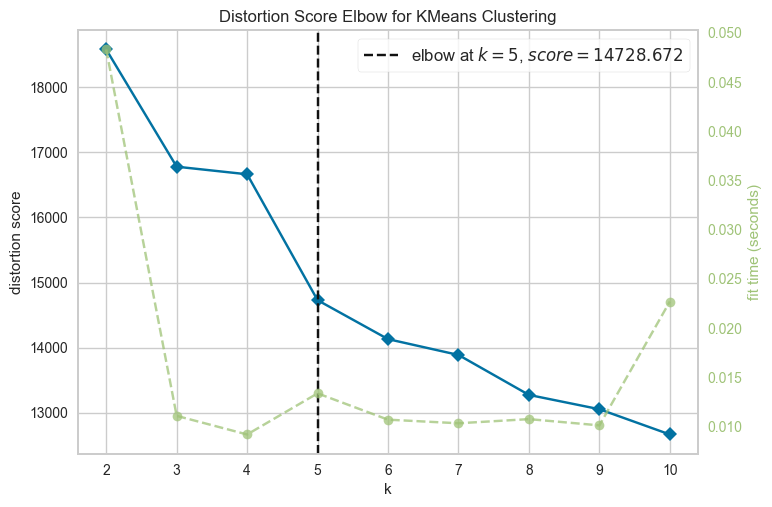

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
df.columns = df.columns.astype(str)
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = 10, random_state = 42)

visualizer.fit(df)
visualizer.show()

Ici, on voit que selon Elbown, le nombre idéal de clusters est entre 4 et 6.
Ce chiffre peut parfois changer en rééxécutant le notebook.

Réalisation du clustering avec 4 clusters dans notre cas

In [51]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df)
pred = kmeans.predict(df)
df['Cluster'] = pred+1
df = df.reset_index('ID')

df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,...,97,98,99,100,101,102,103,104,105,Cluster
0,5524,1,1,0.288195,0.348738,-1.264308,1.529793,1.680176,0.620456,1.312080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2174,1,1,-0.262715,-0.168700,1.395139,-1.191143,-0.962202,-0.501987,-1.186198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,4141,1,0,0.917627,-0.686137,-1.264308,-0.206659,0.282541,-0.501987,1.034493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,6182,1,0,-1.182829,-0.168700,0.065416,-1.062517,-0.918994,-0.501987,-0.908611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5324,3,0,0.295435,1.383614,0.065416,-0.953679,-0.305762,-0.501987,0.201734,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


Maintenant, chaque client a un cluster entre 1 et 4 qui lui est attribué

In [52]:
df_ = pd.merge(df_, df[['ID', 'Cluster']], how='left')


df_['Cluster'] = df_['Cluster'].astype('str')
df_['Cluster'] = np.where(df_['Cluster'] == '1', "Cluster 1", np.where(df_['Cluster'] == '2', "Cluster 2", np.where(df_['Cluster'] == '3', "Cluster 3", "Cluster 4")))

df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,Cluster
0,5524,Graduation,Single,58138.0,3,"(60, 70]",0,663,1617,1,22,4.142857,Cluster 3
1,2174,Graduation,Single,46344.0,2,"(60, 70]",2,113,27,0,4,2.714286,Cluster 1
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",0,312,776,0,20,1.857143,Cluster 3
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,139,53,0,6,1.857143,Cluster 1
4,5324,PhD,Relationship,58293.0,5,"(40,50]",1,161,422,0,14,6.714286,Cluster 2


Visualisation de la répartition des clients par cluster

In [53]:
df_Edu = pd.DataFrame(df_['Cluster'].value_counts()).reset_index()
df_Edu.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_Edu['Cluster'], values=df_Edu['Count'], hole=.3)])
fig.update_layout(width=800, height=400, title='Cluster')
fig.show()

On voit ici que la majorité des clients sont classés dans le 1er cluster (45,9%)

Visualisation des clients et de leur cluster en fonction de leurs revenus et dépenses

In [54]:
fig = px.scatter(df_, x="Income", y="Total_Spend",
                 color="Cluster",
                 hover_data=['Total_Spend', 'Income', 'Cluster'])

fig.update_layout(
    title="Spend vs Income Plot",
    xaxis_title = "Spend",
    yaxis_title = "Income",
    width = 900, height=600
)

fig.show()

Les clients appartenant aux clusters 1 et 2 ont des revenus nettement plus élevés que ceux appartenant aux clusters 3 et 4. Les dépenses du groupe 2 sont les plus élevées, tandis que celles du groupe 4 sont les plus faibles.

Nouveau graphique RFM 3D avec les clusters déterminés sur toutes les dimensions (donc forcément moins visuel que le 1er) :

In [55]:
rfm_data = pd.DataFrame()
rfm_data['Recency'] = df_['Recency_']
rfm_data['Frequency'] = df_['Total_Purchases']
rfm_data['Monetary'] = df_['Total_Spend']
rfm_data['Cluster'] = df_['Cluster']
fig = px.scatter_3d(
    rfm_data, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster',
    title='Segmentation des clients en 3D (RFM)',
    labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_traces(marker=dict(size=3))

fig.show()

Visualisation des clients de chaque cluster en fonction de leur statut marital

In [56]:
df_plot = df_[['Marital_Status', 'Cluster', 'ID']].groupby(['Marital_Status', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Marital_Status", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.show()

In [57]:
df_plot = df_[['Education', 'Cluster', 'ID']].groupby(['Education', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Education", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.update_layout(title="Education")
fig.show()

Aucun client des clusters 2, 3 et 4 n'a plus qu'un niveau d'éducation basic. C'est logique puisque ce sont les clients qui dépensent beaucoup plus, ils appartiennent à des classes sociales plus élevées.

Analyse des réponses aux campagnes par cluster :

In [58]:
df_merged = pd.merge(og, df_[['ID', 'Cluster']], on='ID', how='left')

In [59]:
df_campaigns = df_merged.melt(id_vars=['ID', 'Cluster'], 
                              value_vars=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'], 
                              var_name='Campaign', 
                              value_name='Accepted')

# Filtrer uniquement les campagnes où il y a eu une réponse positive (Accepted = 1)
df_campaigns = df_campaigns[df_campaigns['Accepted'] == 1]

# Calculer le nombre de clients pour chaque combinaison de campagne et cluster
df_summary = df_campaigns.groupby(['Campaign', 'Cluster']).agg(Num_Clients=('ID', 'count')).reset_index()

# Définir les couleurs spécifiques pour chaque cluster et les campagnes en gris clair
color_map = {
    'Cluster 4': '#FCE625',  # Jaune pour Cluster 4
    'Cluster 3': '#35B678',  # Vert pour Cluster 3
    'Cluster 2': '#30678D',  # Bleu pour Cluster 2
    'Cluster 1': '#440153',  # Violet pour Cluster 1
}

# Créer un treemap avec les campagnes comme première dimension et les clusters comme deuxième
fig = px.treemap(df_summary, 
                 path=['Campaign', 'Cluster'],  # Afficher d'abord par campagne, puis par cluster
                 values='Num_Clients',  # Utiliser le nombre de clients comme valeur
                 color='Cluster',  # Colorer par cluster
                 color_discrete_map=color_map,  # Appliquer la carte de couleurs personnalisée
                 hover_data={'Num_Clients': True},  # Afficher seulement le nombre de clients
                 custom_data=['Num_Clients'],  # Ajouter uniquement les données pertinentes
                 title="Réponses aux campagnes marketing par cluster")

# Mettre à jour la mise en page pour enlever les informations inutiles en hover
fig.update_traces(hovertemplate='Nombre de clients: %{customdata[0]}<extra></extra>')

# Afficher le graphique
fig.show()

On voit tout d'abord que la campagne la plus performante a été la dernière ('Reponse') et la moins performante a été la 2ème.
Pour la majorité des campagnes, ce sont les clietns du cluster 4 qui étaient concernés, sauf pour la 3ème campagne.
Le ciblage semble donc plutôt similaire sur chacune des campagnes.
Pour rappel, les clients du 4ème cluster sont ceux qui dépensent le plus et qui ont le plus haut niveau de revenu